In [17]:
!pip install tabulate

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Función para cargar y explorar datos
def cargar_datos(file_path):
    customer_data = pd.read_csv('Mall_Customers.csv')
    print("\nInformación General del Dataset:")
    print(customer_data.info())
    print("\nDescripción Estadística del Dataset:")
    print(customer_data.describe())
    return customer_data

In [20]:
# Función para análisis exploratorio inicial
def analizar_datos(data):
    print("\nValores Nulos por Columna:\n", data.isnull().sum())
    
    # Visualizar outliers en columnas numéricas
    num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    for col in num_cols:
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=data[col])
        plt.title(f"Boxplot: {col}")
        plt.show()

In [21]:
# Función para preprocesar datos
def preprocesar_datos(data):
    # Seleccionar características relevantes
    data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
    
    # Escalar datos
    scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    print("\nDatos Escalados:\n", scaled_data.head())
    return scaled_data

In [22]:
# Función para entrenar modelo K-Means y encontrar el número óptimo de clusters
def entrenar_modelo(X):
    # Método del codo
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Visualizar el método del codo
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Método del Codo')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS')
    plt.grid()
    plt.show()

    # Elegir k=5 basado en el gráfico del codo
    kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(X)

    # Visualizar centroides
    centroids = kmeans.cluster_centers_
    return labels, centroids

In [23]:
# Función para evaluar el modelo
def evaluar_modelo(X, labels):
    sil_score = silhouette_score(X, labels)
    calinski_score = calinski_harabasz_score(X, labels)
    davies_score = davies_bouldin_score(X, labels)

    # Tabla de métricas
    metrics_table = [
        ["Número de Observaciones", len(X)],
        ["Coeficiente Silhouette", sil_score],
        ["Índice Calinski-Harabasz", calinski_score],
        ["Índice Davies-Bouldin", davies_score],
    ]
    print("\nMétricas del Modelo:")
    print(tabulate(metrics_table, headers=["Métrica", "Valor"], tablefmt='pretty'))
    return sil_score, calinski_score, davies_score

In [24]:
# Función para visualizar resultados
def visualizar_resultados(X, labels, centroids):
    plt.figure(figsize=(8, 8))
    colors = ['green', 'red', 'yellow', 'violet', 'blue']
    cluster_labels = [f"Cluster {i+1}" for i in range(len(centroids))]
    
    # Gráficos de dispersión de clusters
    for i, color in enumerate(colors):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=color, label=cluster_labels[i])
    
    # Visualizar centroides
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='cyan', label='Centroides', marker='X')
    plt.title('Grupos de Clientes')
    plt.xlabel('Ingresos Anuales (Escalados)')
    plt.ylabel('Puntuación de Gasto (Escalados)')
    plt.legend()
    plt.grid()
    plt.show()



Información General del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Descripción Estadística del Dataset:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000      

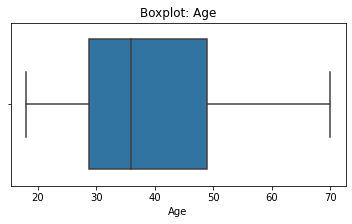

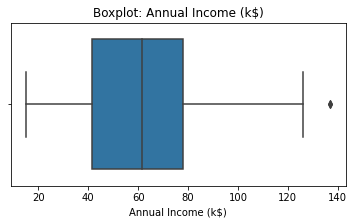

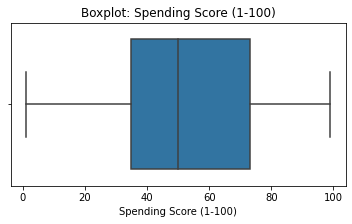


Datos Escalados:
    Annual Income (k$)  Spending Score (1-100)
0            0.000000                0.387755
1            0.000000                0.816327
2            0.008197                0.051020
3            0.008197                0.775510
4            0.016393                0.397959


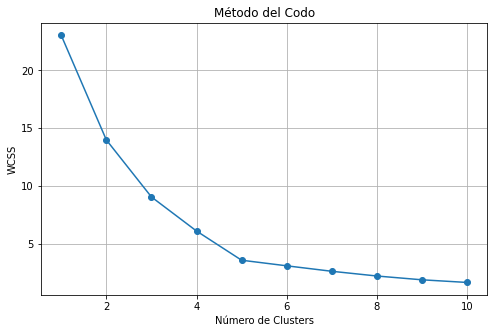


Métricas del Modelo:
+--------------------------+--------------------+
|         Métrica          |       Valor        |
+--------------------------+--------------------+
| Número de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.5594854531227246 |
| Índice Calinski-Harabasz |  264.729808752159  |
|  Índice Davies-Bouldin   | 0.5678112087671997 |
+--------------------------+--------------------+


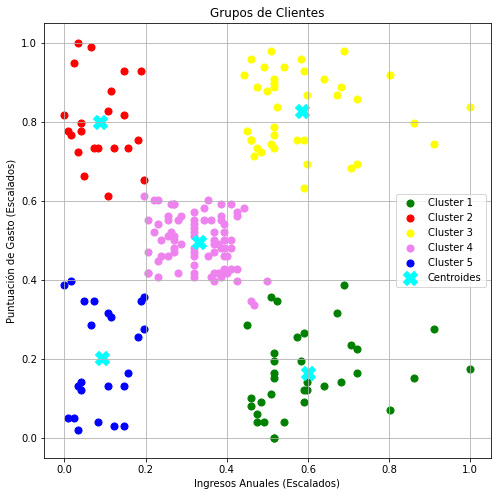

In [25]:
# Función principal
def main():
    # Cargar datos
    file_path = 'Mall_Customers.csv'
    customer_data = cargar_datos(file_path)

    # Análisis Exploratorio
    analizar_datos(customer_data)

    # Preprocesamiento
    scaled_data = preprocesar_datos(customer_data)

    # Entrenar el Modelo
    labels, centroids = entrenar_modelo(scaled_data.values)

    # Evaluar el Modelo
    evaluar_modelo(scaled_data.values, labels)

    # Visualizar Resultados
    visualizar_resultados(scaled_data.values, labels, centroids)

# Ejecutar el script
if __name__ == "__main__":
    main()